In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

Matplotlib is building the font cache; this may take a moment.


In [18]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442256
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344


In [19]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835579
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221161
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616676
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139946


In [20]:
df=df.reset_index()
df.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442256
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344


In [21]:
df.drop(['Date','Adj Close'],axis = 1)
df.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442256
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344


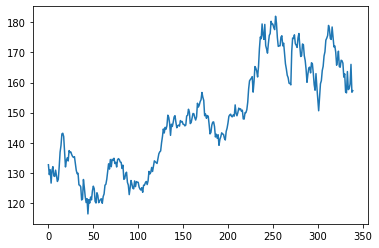

In [8]:
plt.plot(df.Close)

In [22]:
df


,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442256
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344
...,...,...,...,...,...,...,...
2512,2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835579
2513,2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221161
2514,2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2515,2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616676


In [23]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

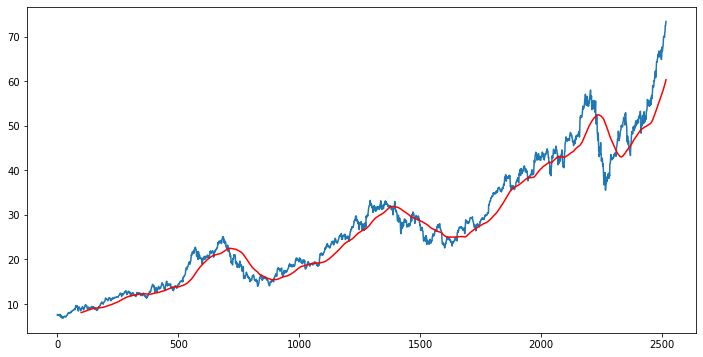

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [25]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

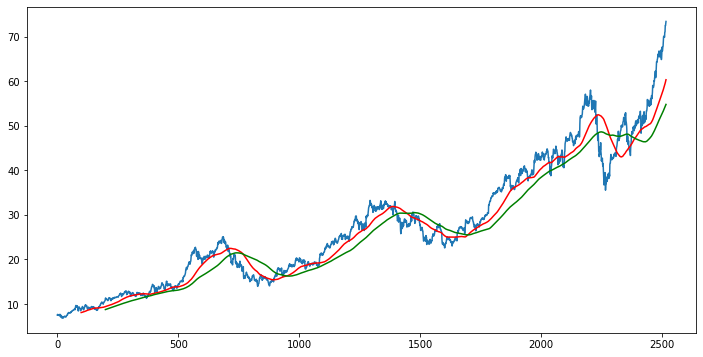

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [27]:
df.shape


(2517, 7)

In [29]:
# splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1761, 1)
(756, 1)


In [32]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [33]:
df.shape


(2517, 7)

In [34]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))

In [50]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [52]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)


In [43]:
#ML model



In [54]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [59]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))




model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))




model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [60]:
model.summary


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x00000164AC31AB30>>

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [62]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 43s 546ms/step - loss: 0.0780
Epoch 2/50
52/52 [==============================] - 27s 509ms/step - loss: 0.0145
Epoch 3/50
52/52 [==============================] - 27s 514ms/step - loss: 0.0119
Epoch 4/50
52/52 [==============================] - 27s 516ms/step - loss: 0.0107
Epoch 5/50
52/52 [==============================] - 28s 535ms/step - loss: 0.0087
Epoch 6/50
52/52 [==============================] - 27s 516ms/step - loss: 0.0085
Epoch 7/50
52/52 [==============================] - 27s 518ms/step - loss: 0.0081
Epoch 8/50
52/52 [==============================] - 27s 523ms/step - loss: 0.0083
Epoch 9/50
52/52 [==============================] - 28s 530ms/step - loss: 0.0080
Epoch 10/50
52/52 [==============================] - 29s 550ms/step - loss: 0.0076
Epoch 11/50
52/52 [==============================] - 27s 522ms/step - loss: 0.0070
Epoch 12/50
52/52 [==============================] - 27s 520ms/step - loss: 0.0072
Epoch 13/50
5

In [63]:
model.save('keras_model.h5')

In [64]:
data_testing.head()


,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [65]:
past_100_days=data_training.tail(100)

In [67]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_8620\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [68]:
final_df.head()


,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [69]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [70]:
input_data.shape


(856, 1)

In [72]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [73]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(756, 100, 1)
(756,)


In [74]:
# making predictions

y_predicted=model.predict(x_test)

In [75]:
y_predicted.shape

(756, 1)

In [76]:
y_test


array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [77]:
y_predicted


array([[0.14698705],
       [0.14783752],
       [0.1486359 ],
       [0.14936003],
       [0.14999625],
       [0.15054032],
       [0.15100476],
       [0.15141915],
       [0.151817  ],
       [0.1522243 ],
       [0.15266213],
       [0.1531337 ],
       [0.15364012],
       [0.15418269],
       [0.15475462],
       [0.15534534],
       [0.15594402],
       [0.15653852],
       [0.15713431],
       [0.15774843],
       [0.15839148],
       [0.15903747],
       [0.1596847 ],
       [0.16038388],
       [0.16122526],
       [0.16227937],
       [0.1636025 ],
       [0.1652402 ],
       [0.16722015],
       [0.16953316],
       [0.17208907],
       [0.17486951],
       [0.17786424],
       [0.18106362],
       [0.18444149],
       [0.18795602],
       [0.19156258],
       [0.19521534],
       [0.19885944],
       [0.20243178],
       [0.2058729 ],
       [0.2091317 ],
       [0.21220283],
       [0.2150758 ],
       [0.21775518],
       [0.22024235],
       [0.22253756],
       [0.224

In [78]:
scaler.scale_

array([0.02099517])

In [79]:
scale_factor=1/0.02099517
y_predicted = y_predicted*scale_factor
y_test=y_test*scale_factor

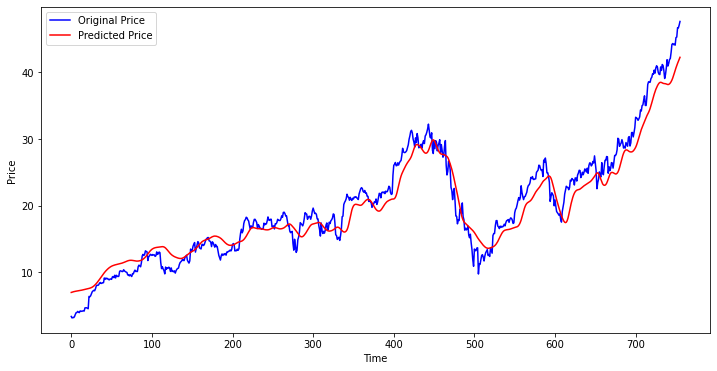

In [81]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()